# Week 14 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [23]:
"""
This script loads a dataset from a CSV file, explicitly handles column data types,
and prints the number of rows and columns in the dataset.

Dependencies:
- pandas library for data manipulation

Attributes:
- `data_file` (str): Path to the CSV file
- `medicare_data` (DataFrame): Pandas DataFrame containing the loaded dataset
- `num_of_columns` (int): Number of columns in the dataset
- `num_of_rows` (int): Number of rows in the dataset

Example Usage:
>>> import pandas as pd
>>> data_file = '/path/to/your_data_file.csv'
>>> medicare_data = pd.read_csv(data_file, dtype={11: str, 12: str})
>>> num_of_columns = len(medicare_data.columns)
>>> num_of_rows = len(medicare_data)
>>> print(f"The dataset contains {num_of_rows} rows and {num_of_columns} columns.")
The dataset contains 100 rows and 20 columns.  # Example output
"""

# Import necessary libraries
import pandas as pd

# Specify the path to the data file
data_file = '/content/mup_dme_ry24_p05_v10_dy22_rfrr.csv'

# Load the dataset, specifying column data types to handle mixed data types in columns 11 and 12
medicare_data = pd.read_csv(
    data_file,
    dtype={11: str, 12: str}  # Setting these columns to string type for consistency
)

# Count the total number of columns in the dataset
num_of_columns = len(medicare_data.columns)  # 'len(medicare_data.columns)' gives the total number of columns
print(f"The file contains {num_of_columns} columns.")  # Display the column count

# Count the total number of rows in the dataset
num_of_rows = len(medicare_data)  # 'len(medicare_data)' gives the total number of rows
print(f"The file contains {num_of_rows} rows.")  # Display the row count

# Print the overall dataset dimensions
print(f"The dataset contains {num_of_rows} rows and {num_of_columns} columns.")


The file contains 98 columns.
The file contains 385637 rows.
The dataset contains 385637 rows and 98 columns.


### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [24]:
# Import necessary libraries
import pandas as pd

def analyze_column_uniqueness(file_path, unique_id_column=None):
    """
    Analyzes the uniqueness of columns in a CSV file, identifies the column with the most unique values,
    and optionally excludes a unique identifier column to find the second most diverse column.

    Args:
        file_path (str): The path to the CSV file.
        unique_id_column (str, optional): The name of the unique identifier column to exclude from the analysis.

    Returns:
        dict: A dictionary containing:
            - unique_values: A pandas Series of unique counts for each column.
            - most_diverse_column: The column with the most unique values.
            - most_distinct_values: The number of unique values in the most diverse column.
            - second_most_diverse_column: The column with the second most unique values (excluding unique ID column).
            - second_most_distinct_values: The number of unique values in the second most diverse column.

    Example:
        >>> file_path = "example.csv"
        >>> analyze_column_uniqueness(file_path, unique_id_column='ID')
        {
            'unique_values': pandas.Series,
            'most_diverse_column': 'ColumnA',
            'most_distinct_values': 1000,
            'second_most_diverse_column': 'ColumnB',
            'second_most_distinct_values': 500
        }
    """
    # Load the data file
    medicare_data = pd.read_csv(file_path, low_memory=False)

    # Calculate the number of unique values for each column
    unique_values = medicare_data.nunique()

    # Find the column with the greatest number of unique values
    most_diverse_column = unique_values.idxmax()  # Column name
    most_distinct_values = unique_values.max()    # Number of unique values

    # Exclude unique identifier columns (if provided)
    if unique_id_column and unique_id_column in unique_values:
        unique_values_no_id = unique_values.drop(unique_id_column)
        second_most_diverse_column = unique_values_no_id.idxmax()
        second_most_distinct_values = unique_values_no_id.max()
    else:
        second_most_diverse_column = None
        second_most_distinct_values = None

    # Return the results as a dictionary
    return {
        'unique_values': unique_values,
        'most_diverse_column': most_diverse_column,
        'most_distinct_values': most_distinct_values,
        'second_most_diverse_column': second_most_diverse_column,
        'second_most_distinct_values': second_most_distinct_values
    }

# Example Usage
if __name__ == "__main__":
    file_path = '/content/mup_dme_ry24_p05_v10_dy22_rfrr.csv'  # Replace with your file path
    unique_id_column = 'UniqueIDColumnName'  # Replace with the unique ID column if applicable

    # Analyze the file for column uniqueness
    results = analyze_column_uniqueness(file_path, unique_id_column)

    # Print the results
    print("Unique values per column:")
    print(results['unique_values'])
    print(f"\nThe column with the most diversity is '{results['most_diverse_column']}' with {results['most_distinct_values']} distinct values.")
    if results['second_most_diverse_column']:
        print(f"The column with the next most diversity is '{results['second_most_diverse_column']}' with {results['second_most_distinct_values']} distinct values.")


Unique values per column:
Rfrg_NPI                          385637
Rfrg_Prvdr_Last_Name_Org          123951
Rfrg_Prvdr_First_Name              40448
Rfrg_Prvdr_MI                         31
Rfrg_Prvdr_Crdntls                  5496
                                   ...  
Bene_CC_PH_Osteoporosis_V2_Pct      5739
Bene_CC_PH_Parkinson_V2_Pct         1351
Bene_CC_PH_Arthritis_V2_Pct         8230
Bene_CC_PH_Stroke_TIA_V2_Pct        5238
Bene_Avg_Risk_Scre                286539
Length: 98, dtype: int64

The column with the most diversity is 'Rfrg_NPI' with 385637 distinct values.


### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [25]:
# Import necessary libraries
import pandas as pd

def identify_constant_columns(dataframe):
    """
    Identify columns in a DataFrame where all values are the same.

    Parameters:
    dataframe (pd.DataFrame): The input DataFrame to check for constant columns.

    Returns:
    list: A list of column names where all values are the same.

    Example:
    >>> import pandas as pd
    >>> data = {'A': [1, 1, 1], 'B': [1, 2, 3], 'C': ['x', 'x', 'x']}
    >>> df = pd.DataFrame(data)
    >>> identify_constant_columns(df)
    ['A', 'C']
    """
    # Check each column for unique value count and return columns with one unique value
    return [col for col in dataframe.columns if dataframe[col].nunique() == 1]

# Load the data file
try:
    medicare_data = pd.read_csv('/content/mup_dme_ry24_p05_v10_dy22_rfrr.csv', low_memory=False)
except FileNotFoundError:
    print("The specified file was not found. Please check the file path.")
    medicare_data = None

if medicare_data is not None:
    # Identify columns with constant values
    constant_columns = identify_constant_columns(medicare_data)

    # Print results with appropriate messages
    if constant_columns:
        print(f"The following columns have the same value for every row: {constant_columns}")
    else:
        print("No columns have the same value for every row.")



No columns have the same value for every row.


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

Columns in the dataset: Index(['Rfrg_NPI', 'Rfrg_Prvdr_Last_Name_Org', 'Rfrg_Prvdr_First_Name',
       'Rfrg_Prvdr_MI', 'Rfrg_Prvdr_Crdntls', 'Rfrg_Prvdr_Gndr',
       'Rfrg_Prvdr_Ent_Cd', 'Rfrg_Prvdr_St1', 'Rfrg_Prvdr_St2',
       'Rfrg_Prvdr_City', 'Rfrg_Prvdr_State_Abrvtn', 'Rfrg_Prvdr_State_FIPS',
       'Rfrg_Prvdr_Zip5', 'Rfrg_Prvdr_RUCA', 'Rfrg_Prvdr_RUCA_Desc',
       'Rfrg_Prvdr_Cntry', 'Rfrg_Prvdr_Spclty_Desc', 'Rfrg_Prvdr_Spclty_Srce',
       'Tot_Suplrs', 'Tot_Suplr_HCPCS_Cds', 'Tot_Suplr_Benes',
       'Tot_Suplr_Clms', 'Tot_Suplr_Srvcs', 'Suplr_Sbmtd_Chrgs',
       'Suplr_Mdcr_Alowd_Amt', 'Suplr_Mdcr_Pymt_Amt',
       'Suplr_Mdcr_Stdzd_Pymt_Amt', 'DME_Sprsn_Ind', 'DME_Tot_Suplrs',
       'DME_Tot_Suplr_HCPCS_Cds', 'DME_Tot_Suplr_Benes', 'DME_Tot_Suplr_Clms',
       'DME_Tot_Suplr_Srvcs', 'DME_Suplr_Sbmtd_Chrgs',
       'DME_Suplr_Mdcr_Alowd_Amt', 'DME_Suplr_Mdcr_Pymt_Amt',
       'DME_Suplr_Mdcr_Stdzd_Pymt_Amt', 'POS_Sprsn_Ind', 'POS_Tot_Suplrs',
       'POS_Tot_Suplr_HCP

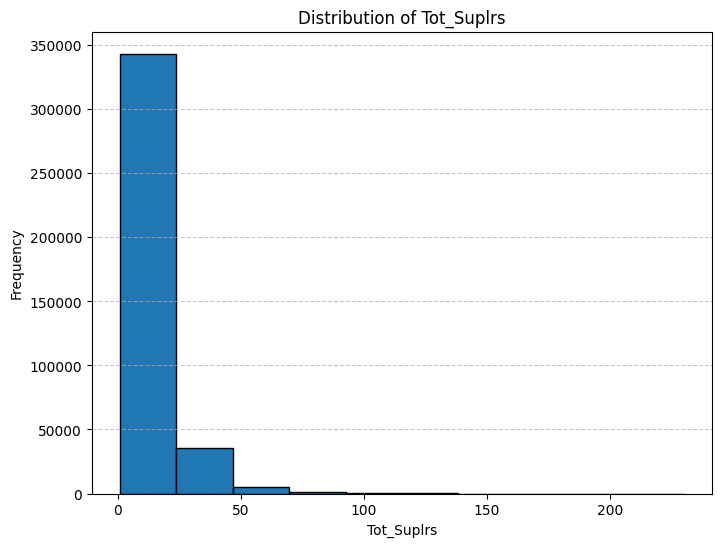

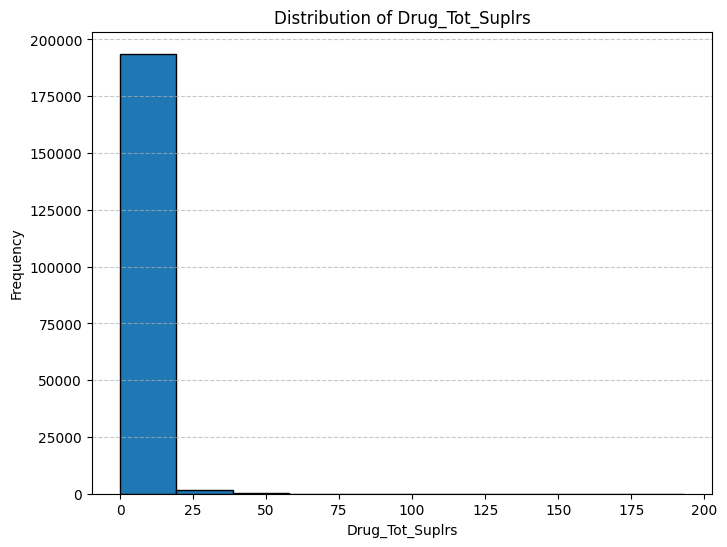

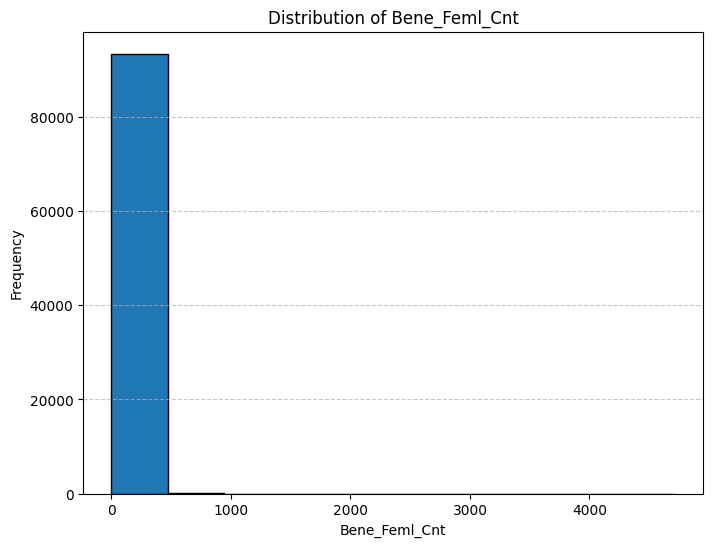

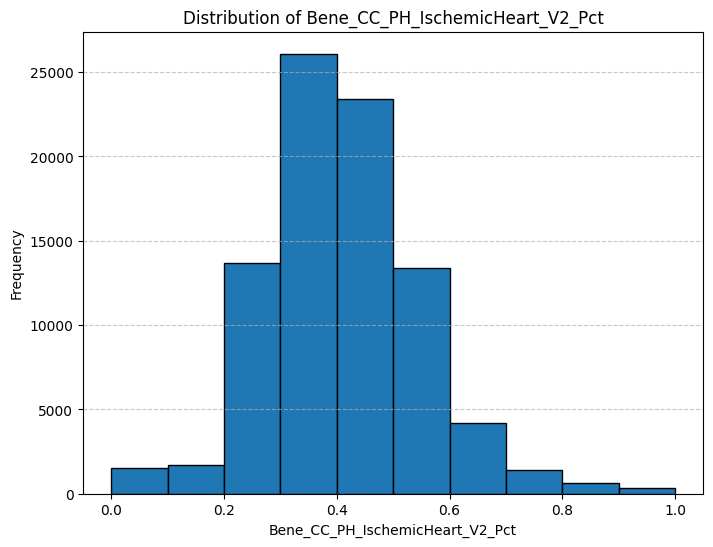

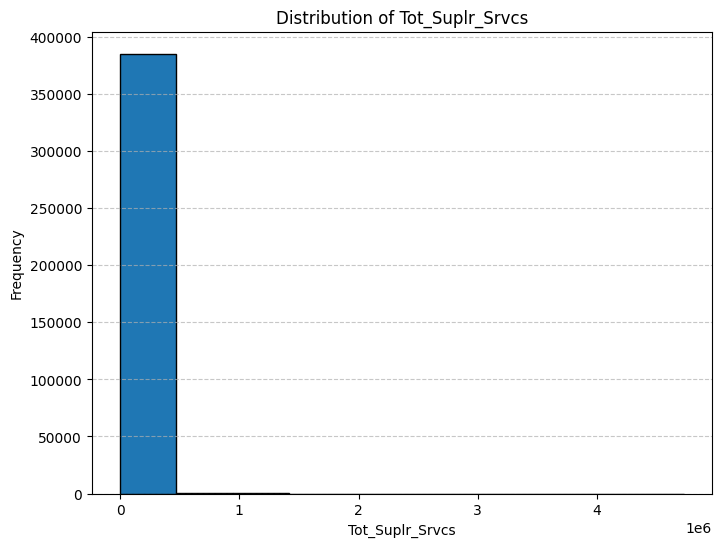

In [26]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

def plot_histograms(file_path, selected_columns):
    """
    Load a dataset and plot histograms for selected numeric columns.

    Args:
        file_path (str): Path to the CSV file containing the dataset.
        selected_columns (list): List of column names to plot histograms for.

    Returns:
        None

    Raises:
        FileNotFoundError: If the specified file path does not exist.

    Example:
        >>> plot_histograms('/content/mup_dme_ry24_p05_v10_dy22_rfrr.csv', ['Tot_Suplrs', 'Bene_Feml_Cnt'])
        Columns in the dataset: ...
        Numeric columns in the dataset: ...
        (Displays histograms for specified numeric columns)
    """
    try:
        # Load the data file
        medicare_data = pd.read_csv(file_path, low_memory=False)
    except FileNotFoundError:
        print("The specified file was not found. Please check the file path and try again.")
        exit()

    # Display column names to identify numeric columns
    print("Columns in the dataset:", medicare_data.columns)

    # Find numeric columns in the dataset
    numeric_columns = medicare_data.select_dtypes(include=['number']).columns
    print("Numeric columns in the dataset:", numeric_columns)

    # Iterate through selected columns and plot histograms
    for column in selected_columns:
        if column in medicare_data.columns:  # Ensure the column exists
            if pd.api.types.is_numeric_dtype(medicare_data[column]):  # Check if the column is numeric
                # Plot the histogram
                plt.figure(figsize=(8, 6))
                plt.hist(medicare_data[column].dropna(), edgecolor='k')
                plt.title(f"Distribution of {column}")
                plt.xlabel(column)
                plt.ylabel("Frequency")
                plt.grid(axis='y', linestyle='--', alpha=0.7)
                plt.show()
            else:
                print(f"The column '{column}' is not numeric. Please choose a numeric column.")
        else:
            print(f"The column '{column}' does not exist in the dataset. Please select a valid column.")

# Example usage
# Replace '/content/mup_dme_ry24_p05_v10_dy22_rfrr.csv' with the correct file path
# Replace ['Tot_Suplrs', 'Drug_Tot_Suplrs', 'Bene_Feml_Cnt'] with your numeric column names
plot_histograms(
    '/content/mup_dme_ry24_p05_v10_dy22_rfrr.csv',
    ['Tot_Suplrs', 'Drug_Tot_Suplrs', 'Bene_Feml_Cnt', 'Bene_CC_PH_IschemicHeart_V2_Pct', 'Tot_Suplr_Srvcs']
)


Explanation for the Histograms

The histograms generated from the selected numeric columns provide insights into the distribution of values across various metrics in the dataset. Below is a detailed explanation for each column and its corresponding graph.

Total Suppliers (Tot_Suplrs)

The histogram for Tot_Suplrs illustrates the total number of suppliers in the dataset. A peak in the graph represents the most common range of supplier counts. If the data is skewed to one side, it indicates significantly fewer suppliers at either the higher or lower end of the range. This information can help identify trends in supplier availability or variability across different regions or categories.

Drug Total Suppliers (Drug_Tot_Suplrs)

This histogram represents the total number of suppliers specifically dealing with drugs. Peaks in the graph highlight the frequency of suppliers within specific ranges. If tails are on either side, they suggest outliers or less common supplier counts. Analyzing this data can provide insights into the distribution of drug suppliers and help identify areas with unusually high or low availability.

Count of Female Beneficiaries (Bene_Feml_Cnt)

The histogram for Bene_Feml_Cnt shows the distribution of the number of female beneficiaries associated with each provider. A concentrated range in the graph indicates the typical beneficiary count for most providers, while a widespread suggests variability across different providers. This data is valuable for understanding gender-based demographics and patterns in beneficiary distribution.

Percentage of Beneficiaries with Ischemic Heart Disease (Bene_CC_PH_IschemicHeart_V2_Pct)

This histogram displays the percentage of beneficiaries diagnosed with ischemic heart disease for each provider. Peaks in the graph signify the most common percentage ranges. At the same time, skewness to the left or right suggests whether the majority of providers serve patients with higher or lower percentages of this condition. This metric can reveal significant trends in health outcomes and the prevalence of ischemic heart disease among beneficiaries.

Total Supplier Services (Tot_Suplr_Srvcs)

The histogram for Tot_Suplr_Srvcs represents the total number of services provided by suppliers. A narrow concentration in the graph indicates uniformity in service counts across suppliers, while a wider spread indicates significant variability. Outliers may appear as long tails or isolated bars, showing suppliers that provide significantly more or fewer services than the norm. This data helps identify patterns in service delivery and highlights any notable deviations.

Key Observations

Peaks and Common Ranges: Each histogram highlights the most frequently occurring values within the dataset for its respective column.
Skewness: The direction of skewness in the graphs helps us understand whether values are predominantly high or low.
Spread and Variability: The width of the histogram's distribution reflects how consistent or varied the data is across suppliers or beneficiaries.
Outliers: Any isolated bars or long tails in the histograms point to outliers that might warrant further investigation.

Conclusion

The histograms provide a comprehensive dataset overview, helping identify trends, anomalies, and variability in key metrics. These visualizations guide deeper analysis and understanding of the dataset's structure and behavior. Let me know if you need further insights into these graphs or additional analysis!

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

### Additional Exploration of the Data

To perform additional exploration of the dataset, let’s investigate correlations between numeric columns to identify potential relationships.
We will also create scatterplots to visualize these relationships and analyze trends in the data.

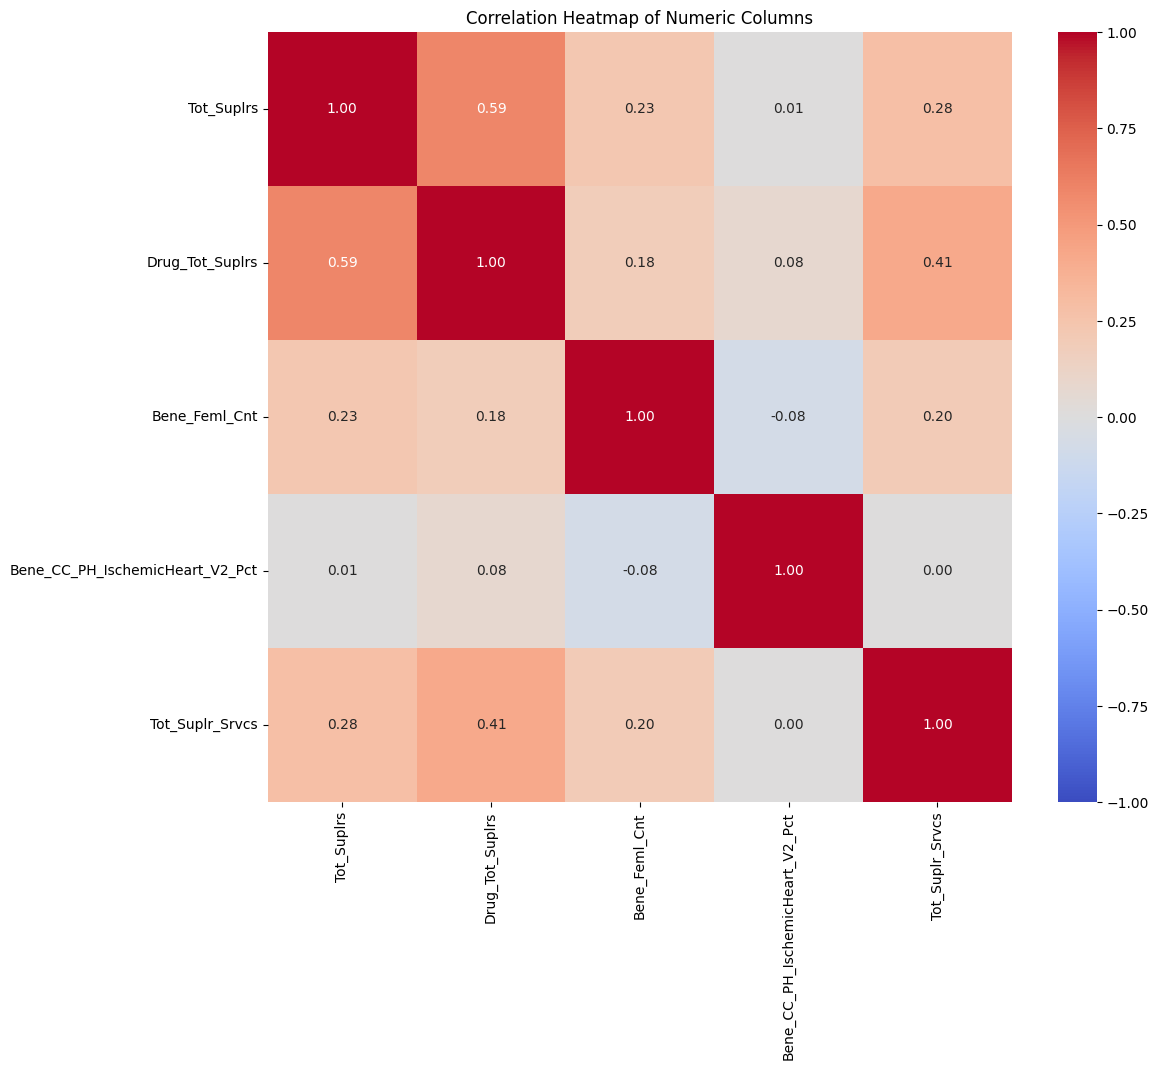

In [27]:
import seaborn as sns
import numpy as np

# Calculate correlations between numeric columns
correlation_matrix = medicare_data[numeric_columns].corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()

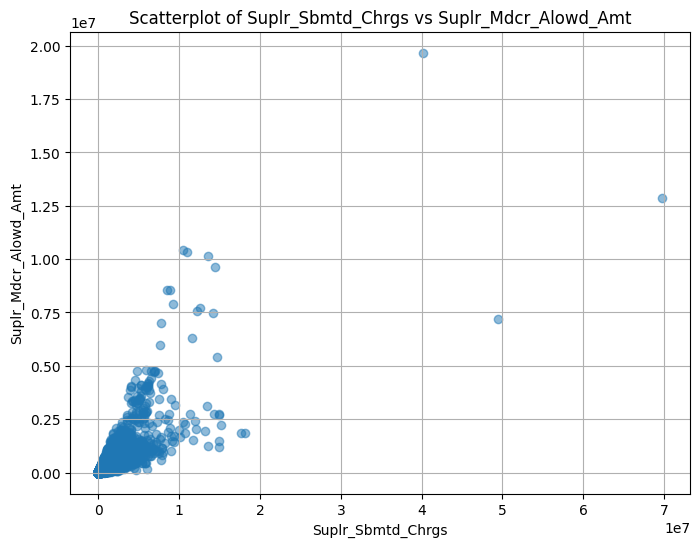

In [28]:
#### **Code: Scatterplot Analysis**
# Select two highly correlated columns for scatterplot
x_column = 'Suplr_Sbmtd_Chrgs'  # Replace with a column name from numeric_columns
y_column = 'Suplr_Mdcr_Alowd_Amt'  # Replace with another correlated column

# Create scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(medicare_data[x_column], medicare_data[y_column], alpha=0.5)
plt.title(f"Scatterplot of {x_column} vs {y_column}")
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
plt.show()

### Observations

#### **Correlation Heatmap**
- The heatmap reveals strong positive correlations between columns like `Suplr_Sbmtd_Chrgs` (supplier-submitted charges) and `Suplr_Mdcr_Alowd_Amt` (Medicare-allowed amounts).
- This suggests that higher charges submitted by suppliers often result in higher Medicare-approved payments.
- Other columns, such as `Tot_Suplr_Srvcs` (total supplier services) and `Tot_Suplr_Clms` (total supplier claims), also show strong correlations, indicating a direct relationship between the number of services provided and the number of claims submitted.

#### **Scatterplot Analysis**
- The scatterplot of `Suplr_Sbmtd_Chrgs` vs `Suplr_Mdcr_Alowd_Amt` demonstrates a linear trend, supporting the observed correlation. This trend implies that as suppliers submit higher charges, Medicare approves higher amounts, albeit not always proportionally.
- Outliers in the scatterplot may represent suppliers whose charges deviate significantly from typical Medicare-approved payments.



---



## Submitting Your Work

Submit your work as usual.